# Task 1: Data Preparation


In [586]:
#Loading and checking the characteristics of the dataset and in this analysis numpy and pandas libraries were loaded
import numpy as np
import pandas as pd
A1data = pd.read_csv('A1data.csv')
A1data.head()
A1data.count()

ISO3                         90
Countries and areas          90
Region                       90
Sub-region                   90
Income Group                 90
Total                        90
Residence (Rural)            85
Residence (Urban)            86
Wealth quintile (Poorest)    83
Wealth quintile (Richest)    83
Time period                  90
dtype: int64

- After checking the dataset, various errors were discovered and corrected as follows

### 1: Getting rid of the different annotations for lower middle income

In [587]:
#Different annotations of lower middle income 
lower_middle_income_variations = [ 
    'Lower middle Income (LM)', 
    'Lower middle income (LMM)', 
    'Lower middle Income (LLM)'
]
# Replace all variations with the standard format "Lower middle income (LM)"
A1data['Income Group'] = A1data['Income Group'].replace(lower_middle_income_variations, 'Lower middle income (LM)')

### 2: Getting rid of any duplicate country names as the entire row is the same

In [588]:
#Removing any duplicate IOS3 rows
A1data = A1data.drop_duplicates(subset='ISO3')
#The count was recalculated to ensure the code was correctly executed
A1data.count()

ISO3                         87
Countries and areas          87
Region                       87
Sub-region                   87
Income Group                 87
Total                        87
Residence (Rural)            82
Residence (Urban)            83
Wealth quintile (Poorest)    80
Wealth quintile (Richest)    80
Time period                  87
dtype: int64

### 4: Removing any unusual time periods

In [589]:
#First, a list of all the unique years were displayed to check for any abnormal years
unique_time_periods = A1data['Time period'].unique()
print(unique_time_periods)

['2018-2019' '2015-2016' '2011-2012' '2019' '2012' '2017-2018' '2016'
 '2018' '2013' '2010' '2014' '2017' '2015' '2014-2015' '2016-2017' '2076'
 '3562' '2011' '2012-2099']


In [590]:
# Thereafter, the following time periods were discovered abnormal and subsequently removed
# For this code .isin was used instead of .drop as the direct row values were removed instead of removing via index labels. 
A1data = A1data[~A1data['Time period'].isin(['2076', '3562', '2012-2099'])]
A1data.count()

ISO3                         84
Countries and areas          84
Region                       84
Sub-region                   84
Income Group                 84
Total                        84
Residence (Rural)            79
Residence (Urban)            80
Wealth quintile (Poorest)    77
Wealth quintile (Richest)    77
Time period                  84
dtype: int64

### 5. Convert percentages to numeric for data exploration

In [591]:
import pandas as pd

# First, a list of columns that contains percentage values were created
percentage_columns = ['Total', 'Residence (Rural)', 'Residence (Urban)', 
                      'Wealth quintile (Poorest)', 'Wealth quintile (Richest)']

# Thereafter, the values were removed of the % sign and converted to numeric through dividing by 100 to get the actual numeric value
for column in percentage_columns:
    A1data[column] = A1data[column].str.rstrip('%').astype('float') / 100

### 6. Drop missing values
- The values with missing values were dropped through dropna() in the pandas library.


In [592]:
A1data = A1data.dropna()
print(A1data.shape)

(77, 11)


### 7: Correcting outliers exceeding 100%
- It was identified that the richest wealth quintile had an outlier exceeding 100%, instead of removing it, the value was corrected to reflect 100%.
- Given that the values were converted to numeric format, the corrected value should was set to 1.

In [593]:
A1data['Wealth quintile (Richest)'] = np.where(A1data['Wealth quintile (Richest)'] > 1, 1, A1data['Wealth quintile (Richest)'])

- Finally, upon completing the cleaning process, the shape of the dataset was checked to ensure that the codes were excecuted successfully and the cleaned data was saved to the file below

In [606]:
print(A1data.shape)
A1data.to_csv('3992417-A1code.csv', index=False)

(77, 11)


# Task 2: Data Exploration

## Task 2.1on.

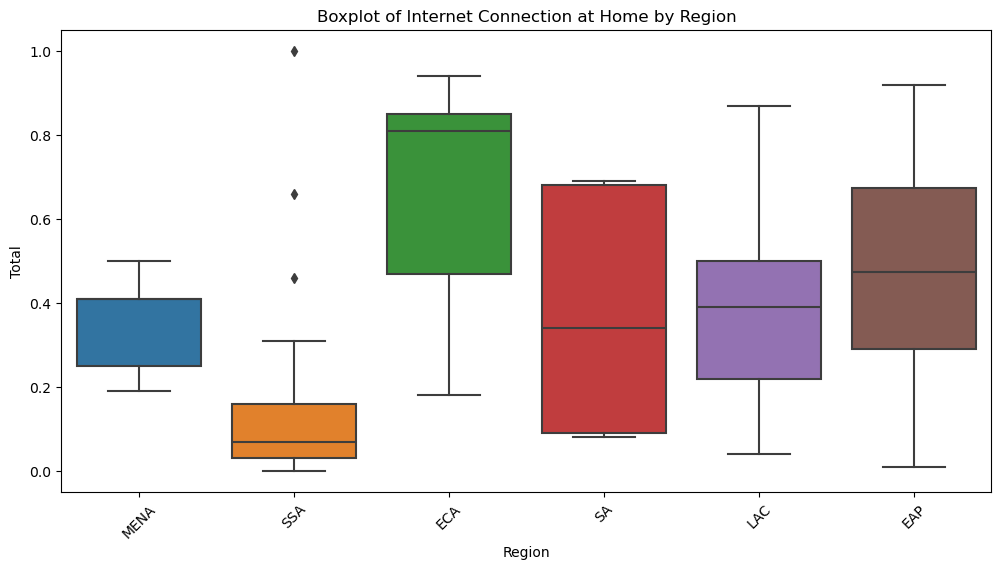

Mean values for each income group:
Region
EAP     0.475
ECA     0.810
LAC     0.390
MENA    0.410
SA      0.340
SSA     0.070
Name: Total, dtype: float64


In [595]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# A boxplot of the 'Total' percentages grouped by 'Region'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Total', data=A1data)
plt.title('Boxplot of Internet Connection at Home by Region')
plt.xticks(rotation=45)
plt.show()

# Median of total for each region
median_by_region = A1data.groupby('Region')['Total'].median()

print("Mean values for each income group:")
print(median_by_region)

## Task 2.2

In [596]:
# Convert Wealth quintile values to percentages again
A1data['Wealth quintile (Poorest)'] *= 100
A1data['Wealth quintile (Richest)'] *= 100

# Calculate the mean percentages
mean_poorest = A1data['Wealth quintile (Poorest)'].mean()
mean_richest = A1data['Wealth quintile (Richest)'].mean()

# The top 10 countries with the highest percentages for each quintile
top10_poorest = A1data.nlargest(10, 'Wealth quintile (Poorest)')
top10_richest = A1data.nlargest(10, 'Wealth quintile (Richest)')

#Mean percentage and the top 10 countries with the highest percentages for each quintile
print(f"Mean percentage for Wealth quintile (Poorest): {mean_poorest:.2f}")
print("Top 10 countries with the highest percentages for Wealth quintile (Poorest):")
print(top10_poorest[['Countries and areas', 'Wealth quintile (Poorest)']])

print(f"Mean percentage for Wealth quintile (Richest): {mean_richest:.2f}")
print("Top 10 countries with the highest percentages for Wealth quintile (Richest):")
print(top10_richest[['Countries and areas', 'Wealth quintile (Richest)']])


Mean percentage for Wealth quintile (Poorest): 18.12
Top 10 countries with the highest percentages for Wealth quintile (Poorest):
   Countries and areas  Wealth quintile (Poorest)
65             Somalia                      100.0
59  Russian Federation                       88.0
9               Brazil                       84.0
77               Tonga                       83.0
15               Chile                       75.0
68           Sri Lanka                       71.0
73     North Macedonia                       68.0
63              Serbia                       65.0
36               Japan                       64.0
40          Kyrgyzstan                       56.0
Mean percentage for Wealth quintile (Richest): 60.99
Top 10 countries with the highest percentages for Wealth quintile (Richest):
   Countries and areas  Wealth quintile (Richest)
5             Barbados                      100.0
10            Bulgaria                      100.0
59  Russian Federation                  

## Task 2.3

In [597]:
# Create a subset for lower middle income group 
Lower_middle = A1data[A1data['Income Group'] == "Lower middle income (LM)"]
Lower_middle.head()

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Residence (Rural),Residence (Urban),Wealth quintile (Poorest),Wealth quintile (Richest),Time period
1,AGO,Angola,SSA,ESA,Lower middle income (LM),0.19,0.02,0.27,0.0,62.0,2015-2016
4,BGD,Bangladesh,SA,SA,Lower middle income (LM),0.34,0.31,0.48,8.0,73.0,2019
7,BOL,Bolivia (Plurinational State of),LAC,LAC,Lower middle income (LM),0.12,0.03,0.17,1.0,56.0,2016
12,CMR,Cameroon,SSA,WCA,Lower middle income (LM),0.05,0.00,0.10,0.0,23.0,2014
22,DJI,Djibouti,SSA,ESA,Lower middle income (LM),0.07,0.02,0.11,2.0,36.0,2012


In [598]:
# Calculate statistics for Rural Children
print("Descriptive Statistics for Lower Middle Income Children in Rural areas:")
Lower_middle['Residence (Rural)'].describe().round(2)

Descriptive Statistics for Lower Middle Income Children in Rural areas:


count    27.00
mean      0.12
std       0.16
min       0.00
25%       0.02
50%       0.05
75%       0.17
max       0.69
Name: Residence (Rural), dtype: float64

In [599]:
#Calculate the variance
Lower_middle['Residence (Rural)'].var()

0.02447037037037038

C:\Users\devan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Histogram of Lower Middle class children in Rural Area with Internet')

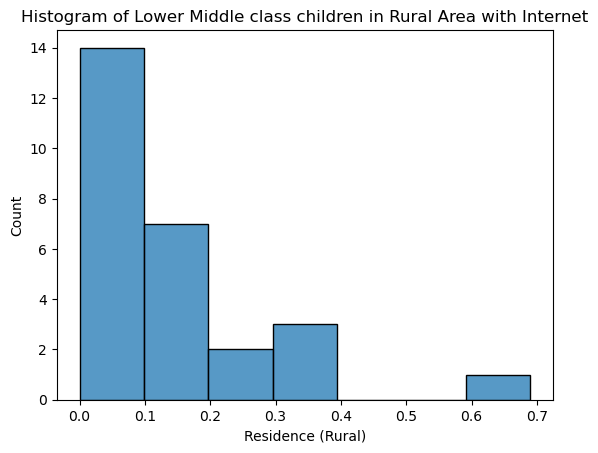

In [600]:
#Display a histogram to showcase distribution.
sns.histplot(x = Lower_middle['Residence (Rural)'])
plt.title('Histogram of Lower Middle class children in Rural Area with Internet')

In [601]:
#Check for the skew value to confirm distribution
Lower_middle['Residence (Rural)'].skew()

2.157921988884471

In [602]:
# Calculate statistics for Urban Children and repeat same process as Rural. 
print("Descriptive Statistics for Lower Middle Income Children in Urban areas:")
Lower_middle['Residence (Urban)'].describe().round(2)

Descriptive Statistics for Lower Middle Income Children in Urban areas:


count    27.00
mean      0.29
std       0.22
min       0.03
25%       0.11
50%       0.25
75%       0.49
max       0.84
Name: Residence (Urban), dtype: float64

In [603]:
#Calculate the variance
Lower_middle['Residence (Urban)'].var()

0.048464102564102565

C:\Users\devan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Histogram of Lower Middle class children in Urban Area with Internet')

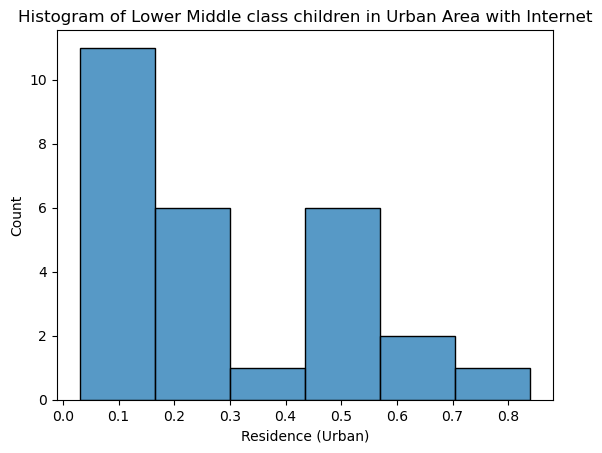

In [604]:
#Display a histogram to showcase distribution.
sns.histplot(x = Lower_middle['Residence (Urban)'])
plt.title('Histogram of Lower Middle class children in Urban Area with Internet')

In [605]:
#Check for the skew value to confirm distribution
Lower_middle['Residence (Urban)'].skew()

0.8221864984787751